In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
node_df = pd.read_csv("../data/opensea_nodes_oct13.csv")
print(len(node_df))

2732


In [4]:
edge_df = pd.read_csv("../data/opensea_edges_oct13.csv")
edge_df['month'] = edge_df['Timestamp'].str[:7]
edge_df['date'] = edge_df['Timestamp'].str[:10]
edge_df['Timestamp'] = pd.to_datetime(edge_df['Timestamp'])
edge_df['TotalPrice'] = edge_df['TotalPrice'].astype("float")/(10**18)
print(edge_df.shape)

(175428, 16)


In [5]:
print("Count of event types")
edge_df['EventType'].value_counts()

Count of event types


created          65667
cancelled        26886
bid_entered      26808
transfer         22379
successful       17385
bid_withdrawn    16303
Name: EventType, dtype: int64

In [6]:
sell_df = edge_df[edge_df['EventType'] == "successful"]

In [7]:
edge_df[edge_df['TokenId'] == 3100]

,SellerAddress,WinnerAddress,Timestamp,EventType,PaymenTokenSymbol,TotalPrice,TokenId,AssetContractAddress,AssetId,TransactionId,BidAmount,AssetNumSales,AssetOwnerAddress,FromAccountAddress,month,date
126795,NaN,NaN,2021-09-14 22:47:08,bid_withdrawn,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,164374831.0,110000000000000000,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,0x319aae1e01c1bfcd106c1063cd230a59375368f5,2021-09,2021-09-14
126796,NaN,NaN,2021-09-14 11:42:33,bid_entered,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,164099462.0,110000000000000000,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,0x319aae1e01c1bfcd106c1063cd230a59375368f5,2021-09,2021-09-14
126797,NaN,NaN,2021-08-30 16:00:57,created,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,156184223.0,NaN,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,NaN,2021-08,2021-08-30
126798,NaN,NaN,2021-08-28 17:16:36,created,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,155086705.0,NaN,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,NaN,2021-08,2021-08-28
126799,NaN,NaN,2021-08-08 11:16:10,bid_entered,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,145701532.0,100000000000000000,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,0xeea014dfe7e902f3848794752de691e1cc583edb,2021-08,2021-08-08
126800,NaN,NaN,2021-08-01 12:28:41,created,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,142933217.0,NaN,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,NaN,2021-08,2021-08-01
126801,NaN,NaN,2021-07-05 10:44:27,bid_entered,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,132847310.0,1000000000000,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,0x72fae93d08a060a7f0a8919708c0db74ca46cbb6,2021-07,2021-07-05
126802,0x6611fe71c233e4e7510b2795c242c9a57790b376,0x0000000000000000000000000000000000000000,2021-03-11 20:57:01,successful,ETH,4200.0,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,89314752.0,NaN,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,NaN,2021-03,2021-03-11
126803,NaN,NaN,2021-03-11 20:54:14,bid_entered,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,89314182.0,4200000000000000000000,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,2021-03,2021-03-11
126804,NaN,NaN,2021-03-04 06:37:43,bid_withdrawn,ETH,NaN,3100,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176563,86909905.0,1404000000000000000000,2,0x7b8961f67382c51c389726667ef7dd7cf95fefd3,0x51636d9efbfb79631824dd6107d54f2dcf548359,2021-03,2021-03-04


# How has the price changed over time?
Timeline of average transaction amount

In [8]:
sell_df['TotalPrice'].describe()

count    17385.000000
mean        31.547822
std         72.403335
min          0.000000
25%          1.150000
50%         18.200000
75%         36.000000
max       4200.000000
Name: TotalPrice, dtype: float64

In [9]:
# Filter out zero ETH transaction
nonzero_trans = edge_df[edge_df['TotalPrice'] > 0]
print(nonzero_trans.shape)
nonzero_trans['TotalPrice'].describe()

(16323, 16)


count    1.632300e+04
mean     3.360037e+01
std      7.425875e+01
min      1.000000e-18
25%      2.400000e+00
50%      1.999000e+01
75%      3.990000e+01
max      4.200000e+03
Name: TotalPrice, dtype: float64

In [10]:
nonzero_trans[['month', 'TotalPrice']].groupby('month').mean()

,TotalPrice
month,
2017-06,0.206060
2017-07,0.536906
2017-08,0.493683
2017-09,0.239074
2017-10,0.168846
2017-11,0.139256
2017-12,0.188118
2018-01,0.261549
2018-02,0.128565


Text(0.5, 1.0, 'Monthly average transaction amount in ETH')

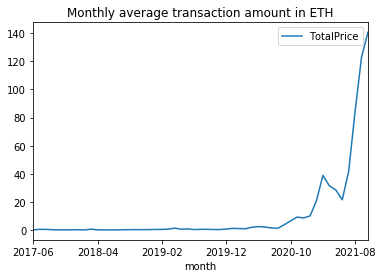

In [11]:
nonzero_trans[['month', 'TotalPrice']].groupby('month').mean().plot()
plt.title("Monthly average transaction amount in ETH")

Text(0.5, 1.0, 'Daily average transaction amount in ETH')

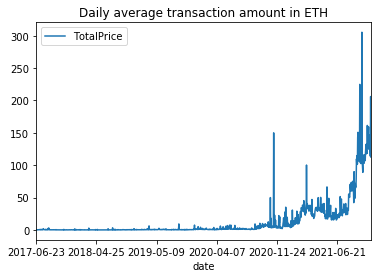

In [12]:
nonzero_trans[['date', 'TotalPrice']].groupby('date').mean().plot()
plt.title("Daily average transaction amount in ETH")

# How has the "sell" volume changed over time?
Timeline of sell occurrences. Only counting nonzero transactions

Text(0.5, 1.0, 'Sell volume occurrences timeline (monthly)')

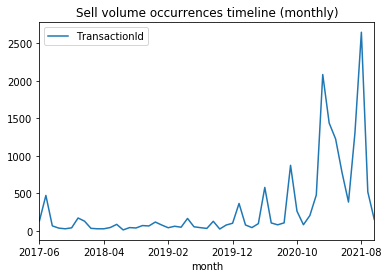

In [13]:
nonzero_trans[['month', 'TransactionId']].groupby('month').count().plot()
plt.title("Sell volume occurrences timeline (monthly)")

Text(0.5, 1.0, 'Sell volume occurrences timeline (daily)')

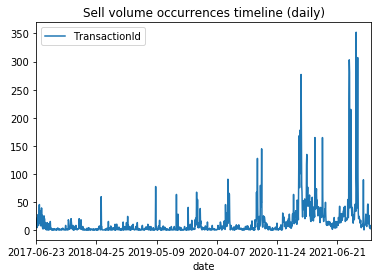

In [14]:
nonzero_trans[['date', 'TransactionId']].groupby('date').count().plot()
plt.title("Sell volume occurrences timeline (daily)")

# Which assets have increased/decreased in price the most?

In [15]:
first_price = sell_df.loc[sell_df.groupby('TokenId')['Timestamp'].idxmin(), ['TokenId', 'TotalPrice']]
latest_price = sell_df.loc[sell_df.groupby('TokenId')['Timestamp'].idxmax(), ['TokenId', 'TotalPrice']]

In [16]:
price_change_df = first_price.set_index('TokenId').join(latest_price.set_index('TokenId'), rsuffix="latest")
price_change_df.columns = ['first_trans_price', 'latest_trans_price']
price_change_df['abs_change'] = price_change_df['latest_trans_price'] - price_change_df['first_trans_price']
price_change_df['perc_change'] = (price_change_df['latest_trans_price'] - price_change_df['first_trans_price']) / price_change_df['first_trans_price']

In [17]:
print("Top gain NFT")
price_change_df.sort_values('abs_change', ascending=False).head(10)

Top gain NFT


,first_trans_price,latest_trans_price,abs_change,perc_change
TokenId,,,,
3100,0.0,4200.0,4200.0,inf
7804,0.0,4200.0,4200.0,inf
5217,2.5,2250.0,2247.5,899.000000
8857,2.5,2000.0,1997.5,799.000000
2338,2.5,1500.0,1497.5,599.000000
2140,400.0,1600.0,1200.0,3.000000
8888,33.1,888.8,855.7,25.851964
3831,0.0,850.0,850.0,inf
6649,1.9,810.0,808.1,425.315789


In [18]:
print("Top loss NFT")
price_change_df.sort_values('abs_change', ascending=False).tail(10)

Top loss NFT


,first_trans_price,latest_trans_price,abs_change,perc_change
TokenId,,,,
3009,99.00,6.800000e+01,-31.000000,-0.313131
3702,33.50,1.300000e-07,-33.500000,-1.000000
1713,34.49,0.000000e+00,-34.490000,-1.000000
6402,85.00,5.000000e+01,-35.000000,-0.411765
1345,40.00,0.000000e+00,-40.000000,-1.000000
9332,95.00,4.850000e+01,-46.500000,-0.489474
5210,53.00,0.000000e+00,-53.000000,-1.000000
8811,61.00,7.300000e-06,-60.999993,-1.000000
6997,99.99,0.000000e+00,-99.990000,-1.000000


# Which assets have been sold the most? How has this price changed over time? How many people have held this asset?

Note that the dataset does NOT have off-platform transactions

In [19]:
print("Top 10 most-sold asset")
sell_df[['TokenId', 'TransactionId']].groupby('TokenId').count().sort_values('TransactionId', ascending=False).head(10)

Top 10 most-sold asset


,TransactionId
TokenId,
3914,16
8970,14
5575,14
6989,14
2832,13
2937,13
6788,13
7392,13
8475,12


In [20]:
sell_df[sell_df['TokenId'] == 3914]

,SellerAddress,WinnerAddress,Timestamp,EventType,PaymenTokenSymbol,TotalPrice,TokenId,AssetContractAddress,AssetId,TransactionId,BidAmount,AssetNumSales,AssetOwnerAddress,FromAccountAddress,month,date
110779,0xccc003f10b7278d86fbe56f5c40d1feb4d2b9e40,0x0000000000000000000000000000000000000000,2021-08-07 00:51:31,successful,ETH,100.00,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,145109237.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-08,2021-08-07
110786,0x20a6f27e11edc08d32c21454b4625eecfb22bb21,0xccc003f10b7278d86fbe56f5c40d1feb4d2b9e40,2021-08-01 17:15:34,successful,ETH,66.66,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,143015042.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-08,2021-08-01
110794,0x850cae094ce34c564327818631287a75d3cee6ca,0x20a6f27e11edc08d32c21454b4625eecfb22bb21,2021-07-30 20:11:58,successful,ETH,42.88,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,142295785.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-07,2021-07-30
110801,0x8a3d2efdb70c3fa23e0f38bdcb95c4f39ad1e127,0x850cae094ce34c564327818631287a75d3cee6ca,2021-07-26 07:51:48,successful,ETH,38.00,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,140458394.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-07,2021-07-26
110828,0x6ec30fd91a504aad948839b985c7263888b2ad68,0x8a3d2efdb70c3fa23e0f38bdcb95c4f39ad1e127,2021-04-17 05:29:40,successful,ETH,35.88,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,103045323.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-04,2021-04-17
110846,0x4c6d87a0df5024003b1439a2152bb2d622ca342b,0x6ec30fd91a504aad948839b985c7263888b2ad68,2021-04-12 22:59:29,successful,ETH,42.00,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,100774419.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-04,2021-04-12
110851,0x13816f65ba8195768e6825eb774fd3c6a05a0ac8,0x4c6d87a0df5024003b1439a2152bb2d622ca342b,2021-02-22 22:54:46,successful,ETH,42.00,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,84162518.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-02,2021-02-22
110856,0xadc229c0dbec4af386ac7b96920369f9770ee6e0,0x13816f65ba8195768e6825eb774fd3c6a05a0ac8,2021-02-21 21:38:55,successful,ETH,25.00,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,83856378.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-02,2021-02-21
110862,0xfc624f8f58db41bdb95aedee1de3c1cf047105f1,0xadc229c0dbec4af386ac7b96920369f9770ee6e0,2021-01-31 01:36:50,successful,ETH,7.00,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,77719422.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-01,2021-01-31
110868,0xee3766e4f996dc0e0f8c929954eaafef3441de87,0xfc624f8f58db41bdb95aedee1de3c1cf047105f1,2021-01-24 00:06:11,successful,ETH,5.49,3914,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178723,76058503.0,NaN,16,0x0d93bc9654df5a50e0e65df55d09ba7b47fb95cd,NaN,2021-01,2021-01-24


Text(0.5, 1.0, 'Price timeline for asset 3914')

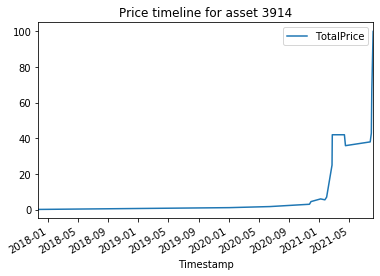

In [21]:
sell_df[sell_df['TokenId'] == 3914].plot(x='Timestamp', y="TotalPrice")
plt.title("Price timeline for asset 3914")

In [22]:
total_count = len(set(sell_df.loc[sell_df['TokenId'] == 3914, 
                                  ['SellerAddress', 'WinnerAddress']].values.flatten())) - 2
print("Wallets that have owned the asset 3914 (TOTAL {} excluding nan and 0x00):".format(total_count))
set(sell_df.loc[sell_df['TokenId'] == 3914, ['SellerAddress', 'WinnerAddress']].values.flatten())

Wallets that have owned the asset 3914 (TOTAL 17 excluding nan and 0x00):


{'0x0000000000000000000000000000000000000000',
 '0x0d41f957181e584db82d2e316837b2de1738c477',
 '0x13816f65ba8195768e6825eb774fd3c6a05a0ac8',
 '0x20a6f27e11edc08d32c21454b4625eecfb22bb21',
 '0x4c6d87a0df5024003b1439a2152bb2d622ca342b',
 '0x50c946cb9757d6de490099c0ec185a0dfe29974b',
 '0x566f193d80c76a324cf5e521d62657f4c4d4ccc5',
 '0x5b331eb6df00b5765894f88e54d2a87128188ec7',
 '0x624394c3e8699980162fa15e23fdb707d9a53517',
 '0x6ec30fd91a504aad948839b985c7263888b2ad68',
 '0x850cae094ce34c564327818631287a75d3cee6ca',
 '0x8a3d2efdb70c3fa23e0f38bdcb95c4f39ad1e127',
 '0xadc229c0dbec4af386ac7b96920369f9770ee6e0',
 '0xbfa319ef5529b88a0ad94dcc36d438dcafac0e52',
 '0xccc003f10b7278d86fbe56f5c40d1feb4d2b9e40',
 '0xee3766e4f996dc0e0f8c929954eaafef3441de87',
 '0xee402489d83e2b22d496910f8c810d35a3ad7b25',
 '0xfc624f8f58db41bdb95aedee1de3c1cf047105f1',
 nan}

# Which wallet has the most CryptoPunks assets?

In [23]:
print("Current ownership top 10:")
edge_df[['TokenId', 'AssetOwnerAddress']].drop_duplicates()['AssetOwnerAddress'].value_counts().head(10)

Current ownership top 10:


0xb7f7f6c52f2e2fdb1963eab30438024864c313f6    256
0xa25803ab86a327786bb59395fc0164d826b98298    253
0xc352b534e8b987e036a93539fd6897f53488e56a    241
0xb88f61e6fbda83fbfffabe364112137480398018    215
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647    172
0x69021ae8769586d56791d29615959997c2012b99    147
0xcffc336e6d019c1af58257a0b10bf2146a3f42a4    125
0x269616d549d7e8eaa82dfb17028d0b212d11232a    104
0xd79b937791724e47f193f67162b92cdfbf7abdfd    102
0x4084df8bf74ba73f04eb39b89df698608df7f4b5     98
Name: AssetOwnerAddress, dtype: int64


# Which wallet has bought assets the most?

In [24]:
print("Bid winning count by wallet (top 10)")
sell_df['WinnerAddress'].value_counts().head(10)

Bid winning count by wallet (top 10)


0x0000000000000000000000000000000000000000    2687
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459     311
0x269616d549d7e8eaa82dfb17028d0b212d11232a     230
0x7d438bf6567673867480b7923669bf349e6c8c12     161
0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685     149
0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7     133
0x650dcdeb6ecf05ae3caf30a70966e2f395d5e9e5     106
0x78f0269f5b1ca914c8c58993f41181f89e212b27      99
0x0d41f957181e584db82d2e316837b2de1738c477      98
0x303052148a78a692d7aa89bad454f3e91785488d      85
Name: WinnerAddress, dtype: int64

# Which wallet has the most transaction (all types) in CryptoPunks?

In [25]:
transaction_count_by_wallet = pd.DataFrame([edge_df['SellerAddress'].value_counts(), edge_df['WinnerAddress'].value_counts(), edge_df['FromAccountAddress'].value_counts()])
transaction_count_by_wallet = transaction_count_by_wallet.transpose()
transaction_count_by_wallet.columns = ['sell_count', 'win_count', 'bid_count']
transaction_count_by_wallet['total'] = np.sum(transaction_count_by_wallet, axis=1)
transaction_count_by_wallet = transaction_count_by_wallet.fillna(0).astype('int')

In [26]:
print("Top 20 wallets with the highest transaction counts:")
transaction_count_by_wallet.sort_values('total', ascending=False).head(20)

Top 20 wallets with the highest transaction counts:


,sell_count,win_count,bid_count,total
0x0000000000000000000000000000000000000000,0,2687,0,2687
0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,0,0,2539,2539
0x7174039818a41e1ae40fdcfa3e293b0f41592af2,0,10,2093,2103
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,204,311,1293,1808
0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,235,3,801,1039
0x00d7c902fbbcd3c9db2da80a439c94486c50eb81,0,20,784,804
0xcbd482af76059e2a5e4a825c4cd5ced9f2dfe286,12,0,729,741
0xc352b534e8b987e036a93539fd6897f53488e56a,73,43,576,692
0x899241b0c41051313ce36271a7e13d54c94877a1,37,30,576,643
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647,345,31,260,636


# Which wallet has gained/lost the most so far in CryptoPunks?

In [27]:
def calculate_gain(wallet_addr):
    return edge_df.loc[edge_df['SellerAddress'] == wallet_addr, 'TotalPrice'].sum()

def calculate_loss(wallet_addr):
    return edge_df.loc[edge_df['WinnerAddress'] == wallet_addr, 'TotalPrice'].sum()

In [28]:
transaction_count_by_wallet['gain'] = [calculate_gain(addr) for addr in transaction_count_by_wallet.index]
transaction_count_by_wallet['loss'] = [calculate_loss(addr) for addr in transaction_count_by_wallet.index]
transaction_count_by_wallet['net_gain'] = transaction_count_by_wallet['gain'] - transaction_count_by_wallet['loss']

In [29]:
print("Wallet that gained the most (top 10)")
transaction_count_by_wallet.sort_values('net_gain', ascending=False).head(10)

Wallet that gained the most (top 10)


,sell_count,win_count,bid_count,total,gain,loss,net_gain
0x6611fe71c233e4e7510b2795c242c9a57790b376,151,39,122,312,12927.160000,460.57420,12466.585800
0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647,345,31,260,636,11757.281000,788.81000,10968.471000
0x6f4a2d3a4f47f9c647d86c929755593911ee91ec,221,5,4,230,8695.524203,45.92000,8649.604203
0xcc7c335f3365ae3f7e4e8c9535dc92780a4add9d,65,1,15,81,5364.668844,130.00000,5234.668844
0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e,2,7,11,20,5000.000000,6.98000,4993.020000
0x0b88fd87884080bd6d93d341fcca0eea76b03e75,104,10,0,114,4613.562000,225.00000,4388.562000
0x00b278dd68f9d8491795ffaf771120638bef1686,42,61,6,109,3894.290000,19.77900,3874.511000
0xe83c750b2708320bb134796c555b80df39a3d97b,9,19,67,95,3905.000000,103.11000,3801.890000
0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,204,311,1293,1808,7358.570000,3690.00191,3668.568090
0xca8fe4acb1cb8b5550a3c71ffe2399f6c7016686,176,0,87,263,3246.950000,0.00000,3246.950000


In [30]:
print("Wallet that lost the most (bottom 10)")
transaction_count_by_wallet.sort_values('net_gain', ascending=False).tail(10)

Wallet that lost the most (bottom 10)


,sell_count,win_count,bid_count,total,gain,loss,net_gain
0x702a39a9d7d84c6b269efaa024dff4037499bba9,0,18,0,18,0.0,1895.830,-1895.830
0xf2a70bedcc1ea9145cfc2eacc670e798a713b9ad,0,1,1,2,0.0,2000.000,-2000.000
0xd6a984153acb6c9e2d788f08c2465a1358bb89a7,0,7,0,7,0.0,2052.730,-2052.730
0x8f7ceefaa1ff5dfd125106ff9e219eff360d57aa,0,1,1,2,0.0,2250.000,-2250.000
0x896848ad1a2094b874daf951d249ce0115afb6bf,0,18,0,18,0.0,2414.350,-2414.350
0x650dcdeb6ecf05ae3caf30a70966e2f395d5e9e5,0,106,210,316,0.0,2852.630,-2852.630
0xf605c6c3caa1606afad60cfef1d37f76721640d7,1,31,16,48,99.0,2984.869,-2885.869
0x956d14b8b548ac2db7069ad33d7b86e6d99f2297,0,8,20,28,0.0,2897.920,-2897.920
0xf4b4a58974524e183c275f3c6ea895bc2368e738,10,13,72,95,1584.0,5353.400,-3769.400
0x0000000000000000000000000000000000000000,0,2687,0,2687,0.0,69528.876,-69528.876


# Which sell transaction was the biggest gain/loss in CryptoPunks?

In [31]:
prev_tok = -1
prev_winner = ''
prev_price = -10

resell_trans = []
for ind in range(len(sell_df)-1, 0, -1):
    row = sell_df.iloc[ind]
    if prev_tok == row['TokenId']:
        if prev_winner == row['SellerAddress']:
            resell_trans.append([row['TokenId'], row['SellerAddress'], prev_price, row['TotalPrice'], row['TotalPrice'] - prev_price])
            
    prev_tok = row['TokenId']
    prev_winner = row['WinnerAddress']
    prev_price = row['TotalPrice']

In [32]:
resell_trans_df = pd.DataFrame(resell_trans, columns = ['TokenId', 'SellerAddress', 'BoughtPrice', 'SoldPrice', 'NetGain'])

In [33]:
print("Top 10 net gain transactions:")
resell_trans_df.sort_values('NetGain', ascending=False).head(10)

Top 10 net gain transactions:


,TokenId,SellerAddress,BoughtPrice,SoldPrice,NetGain
5578,8888,0x301874ccffa7587ccddf8a6198fb91fb9878fcc9,33.10,888.8,855.70
852,2140,0x49705967e4a9e3688a393e88eea088562c56ee1f,750.00,1600.0,850.00
4275,6965,0x03911fecabd6b4809c88e2e6eb856ec932b2ee3e,4.00,800.0,796.00
2179,3831,0xf6bc89cc57e33c4e8053c4d8e63b70bf8c47e1a1,70.00,850.0,780.00
2391,4156,0x9e199d8a3a39c9892b1c3ae348a382662dcbaa12,3.29,650.0,646.71
4464,7252,0x9fce8eb77fb67660cb134f4ee4c82a48f415f812,1000.00,1600.0,600.00
5968,9052,0xc72aed14386158960d0e93fecb83642e68482e4b,18.00,500.0,482.00
717,1886,0x6611fe71c233e4e7510b2795c242c9a57790b376,2.29,450.0,447.71
4047,6649,0xe1d29d0a39962a9a8d2a297ebe82e166f8b8ec18,450.00,810.0,360.00
1555,3011,0x78f0269f5b1ca914c8c58993f41181f89e212b27,42.00,400.0,358.00


In [34]:
print("Top 10 net gain transactions:")
resell_trans_df.sort_values('NetGain', ascending=False).tail(10)

Top 10 net gain transactions:


,TokenId,SellerAddress,BoughtPrice,SoldPrice,NetGain
3807,6335,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,81.00,0.0,-81.00
701,1859,0xd54e6e49c1dd1e99b70f26153fb28383b434823e,82.00,0.0,-82.00
3347,5683,0x000000aaee6a496aaf7b7452518781786313400f,86.00,0.0,-86.00
4298,6997,0x74be0af0bf7254328ddffc09425ff71d64a1a836,97.19,0.0,-97.19
1288,2733,0x74be0af0bf7254328ddffc09425ff71d64a1a836,97.50,0.0,-97.50
3061,5210,0xa11b6b523ae3e63164de5ab0c7d6d565e22e3f7b,98.61,0.0,-98.61
5841,9042,0x74be0af0bf7254328ddffc09425ff71d64a1a836,100.00,0.0,-100.00
6288,9913,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,107.00,0.0,-107.00
854,2142,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,125.00,0.0,-125.00
2418,4189,0x8a10c613195176fd4fb9019d561338f9f7275f16,138.55,0.0,-138.55


# How many assets are listed on CryptoPunks in OpenSea??

In [35]:
print(len(edge_df['TokenId'].unique()))

9320


# How many have been traded?

In [36]:
print(len(sell_df['TokenId'].unique()))

6382


# Timeline of "creation" event occurrence

Text(0.5, 1.0, 'Creation event occurrences timeline (daily)')

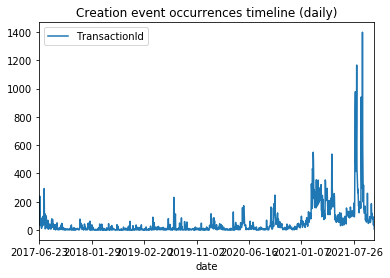

In [42]:
edge_df.loc[edge_df['EventType'] == "created", ['TransactionId', 'date']].groupby('date').count().plot()
plt.title("Creation event occurrences timeline (daily)")

Text(0.5, 1.0, 'Creation event occurrences timeline (monthly)')

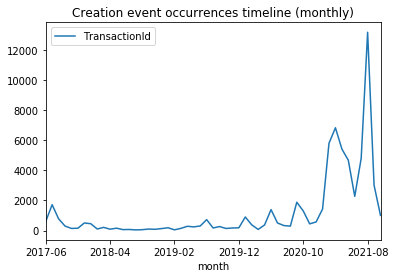

In [43]:
edge_df.loc[edge_df['EventType'] == "created", ['TransactionId', 'month']].groupby('month').count().plot()
plt.title("Creation event occurrences timeline (monthly)")